# Case Study 3: Data Analytics, Insights Generation and Model Building

## Step 1: Data Insights

### Expectation
1. Import the data "Case Study 3 - Beer Volume Data.xlsx" to your enviroNment (Python / R) and perform data exploratory.
2. You need to understand the Beer volume (dependent variable) trend, its growth pattern, impact of major events i.e. FIFA world cup, seasonality in the data.
3. You also need to study the relation between dependent variable and other independent variables.
4. Make use of charts to explain your findings

## Step 2: Model Building

**Anheuser-Busch InBev** is the world's largest brewer. We track our volume across countries, the growth and potential market share gain. Based on the outcome, we make our short term and long term strategies. 

1. Now that you understand the "Case Study 3 - Beer Volume Data" data, predict how the next 2 years look like
2. You can use any model (examples: univariate technique, multivariate, moving average etc)
3. Based on your insights, what kind of short term (6 months) and long term (2 years) strategices would you suggest to the leaders?

## Importing the libraries

In [9]:
# Some sample imports. You can use more imports as per your requirements
import warnings
warnings.simplefilter('ignore')

# Utilities
import numpy as np
import pandas as pd

# Generic Statistical/ML imports
# from sklearn import 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import style
plt.style.use("seaborn-pastel")

In [8]:
from datetime import datetime

In [34]:
df=pd.read_excel('/Users/cb-it-01-1463/Downloads/BeerVol.xlsx')

In [35]:
df

,Geography,Period,Volume_KHL,Price,Real_Price,CPI,Interest_Rate_Long_Term_month,Consumer_Price_Index_quarter,Exchange_Rate_LCU_per_US_Period_Average_quarter,Nominal_Consumption_Total_US_quarter,...,Memorial_Day,National_Day_May_1810_Revolution,National_Sovereignty_Day,New_Year_s_Day,Public_Holiday_Bicentenary_of_the_Argentine_Flag,San_Martín_Day,max_T_cel_5MA,min_T,avg_T,Precipitation_1YP
0,Argentina,2018-01-01,1428.63,4.89,0.02,279.68,13.30,46.72,3.53,262.19,...,0,0,0,1,0,0,31.53,62.28,75.52,2.27
1,Argentina,2018-02-01,1105.99,5.10,0.02,281.63,12.19,46.72,3.53,262.19,...,0,0,0,0,0,0,30.50,62.65,74.78,3.39
2,Argentina,2018-03-01,989.26,5.22,0.02,287.23,12.24,46.72,3.53,262.19,...,1,0,0,0,0,0,29.49,61.48,73.29,3.25
3,Argentina,2018-04-01,898.53,5.28,0.02,292.06,12.92,47.32,3.71,252.46,...,0,0,0,0,0,0,26.79,53.80,67.01,2.06
4,Argentina,2018-05-01,746.15,5.35,0.02,294.32,13.26,47.32,3.71,252.46,...,0,1,0,0,0,0,21.71,47.87,59.48,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Argentina,2022-08-01,NaN,274.97,0.03,10864.44,9.71,800.30,118.58,300.20,...,0,0,0,0,0,1,20.24,NaN,NaN,1.99
164,Argentina,2022-09-01,NaN,280.50,0.03,11092.60,9.51,800.30,118.58,300.20,...,0,0,0,0,0,0,22.56,NaN,NaN,2.69
165,Argentina,2022-10-01,NaN,286.14,0.03,11252.41,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,24.24,NaN,NaN,3.14
166,Argentina,2022-11-01,NaN,287.80,0.03,11414.54,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,4.05,NaN,NaN,1.00


**Doing descriptive analysis**

In [36]:
df['Period'] = pd.to_datetime(df['Period'])
pd.set_option('display.float_format', '{:.2f}'.format)

In [37]:
df.isnull().sum()

Geography             0
Period                0
Volume_KHL           43
Price                 0
Real_Price            0
                     ..
San_Martín_Day        0
max_T_cel_5MA         0
min_T                39
avg_T                39
Precipitation_1YP     0
Length: 69, dtype: int64

We can see that the data has 69 variables including our dependent variable.

In [38]:
df.columns

Index(['Geography', 'Period', 'Volume_KHL', 'Price', 'Real_Price', 'CPI',
       'Interest_Rate_Long_Term_month', 'Consumer_Price_Index_quarter',
       'Exchange_Rate_LCU_per_US_Period_Average_quarter',
       'Nominal_Consumption_Total_US_quarter', 'Nominal_GDP_US_quarter',
       'Nominal_Private_Consumption_US_quarter',
       'Real_GDP_Growth_Rate_Year_on_Year_quarter',
       'Real_Consumption_Total_lcu_quarter',
       'Real_Consumption_Total_US_quarter', 'Real_GDP_lcu_quarter',
       'Real_GDP_US_quarter', 'Real_Government_Consumption_lcu_quarter',
       'Real_Government_Consumption_US_quarter',
       'Real_Private_Consumption_lcu_quarter',
       'Real_Private_Consumption_US_quarter', 'Unemployment_Rate_quarter',
       'Consumer_Price_Index_annual', 'Employment_Total_annual',
       'Full_Employment_Real_GDP_annual', 'Labor_Force_annual',
       'Nominal_Consumption_Total_US_annual', 'Nominal_GDP_US_annual',
       'Price_of_Crude_Oil_LCU_basis_annual', 'Real_GDP_lcu_annua

In [39]:
df.describe

<bound method NDFrame.describe of       Geography     Period  Volume_KHL  Price  Real_Price      CPI  \
0    Argentina  2018-01-01     1428.63   4.89        0.02   279.68   
1    Argentina  2018-02-01     1105.99   5.10        0.02   281.63   
2    Argentina  2018-03-01      989.26   5.22        0.02   287.23   
3    Argentina  2018-04-01      898.53   5.28        0.02   292.06   
4    Argentina  2018-05-01      746.15   5.35        0.02   294.32   
..          ...        ...         ...    ...         ...      ...   
163  Argentina  2022-08-01         NaN 274.97        0.03 10864.44   
164  Argentina  2022-09-01         NaN 280.50        0.03 11092.60   
165  Argentina  2022-10-01         NaN 286.14        0.03 11252.41   
166  Argentina  2022-11-01         NaN 287.80        0.03 11414.54   
167  Argentina  2022-12-01         NaN 292.02        0.02 11887.39   

     Interest_Rate_Long_Term_month  Consumer_Price_Index_quarter  \
0                            13.30                       

In [40]:
df.nunique()

Geography              1
Period               108
Volume_KHL           125
Price                168
Real_Price           144
                    ... 
San_Martín_Day         2
max_T_cel_5MA        168
min_T                129
avg_T                129
Precipitation_1YP    167
Length: 69, dtype: int64

In [41]:
df = df[df['Volume_KHL'].notna()]

In [42]:
df.shape

(125, 69)

### Analysing the data using various plots

#### 1. Creating a correlation matrix between all the columns to see how they relate with each other. Our main focus here is to note the variables which have a high correlation with Volume_KHL

In [43]:
correlate = df.corr()

<AxesSubplot:>

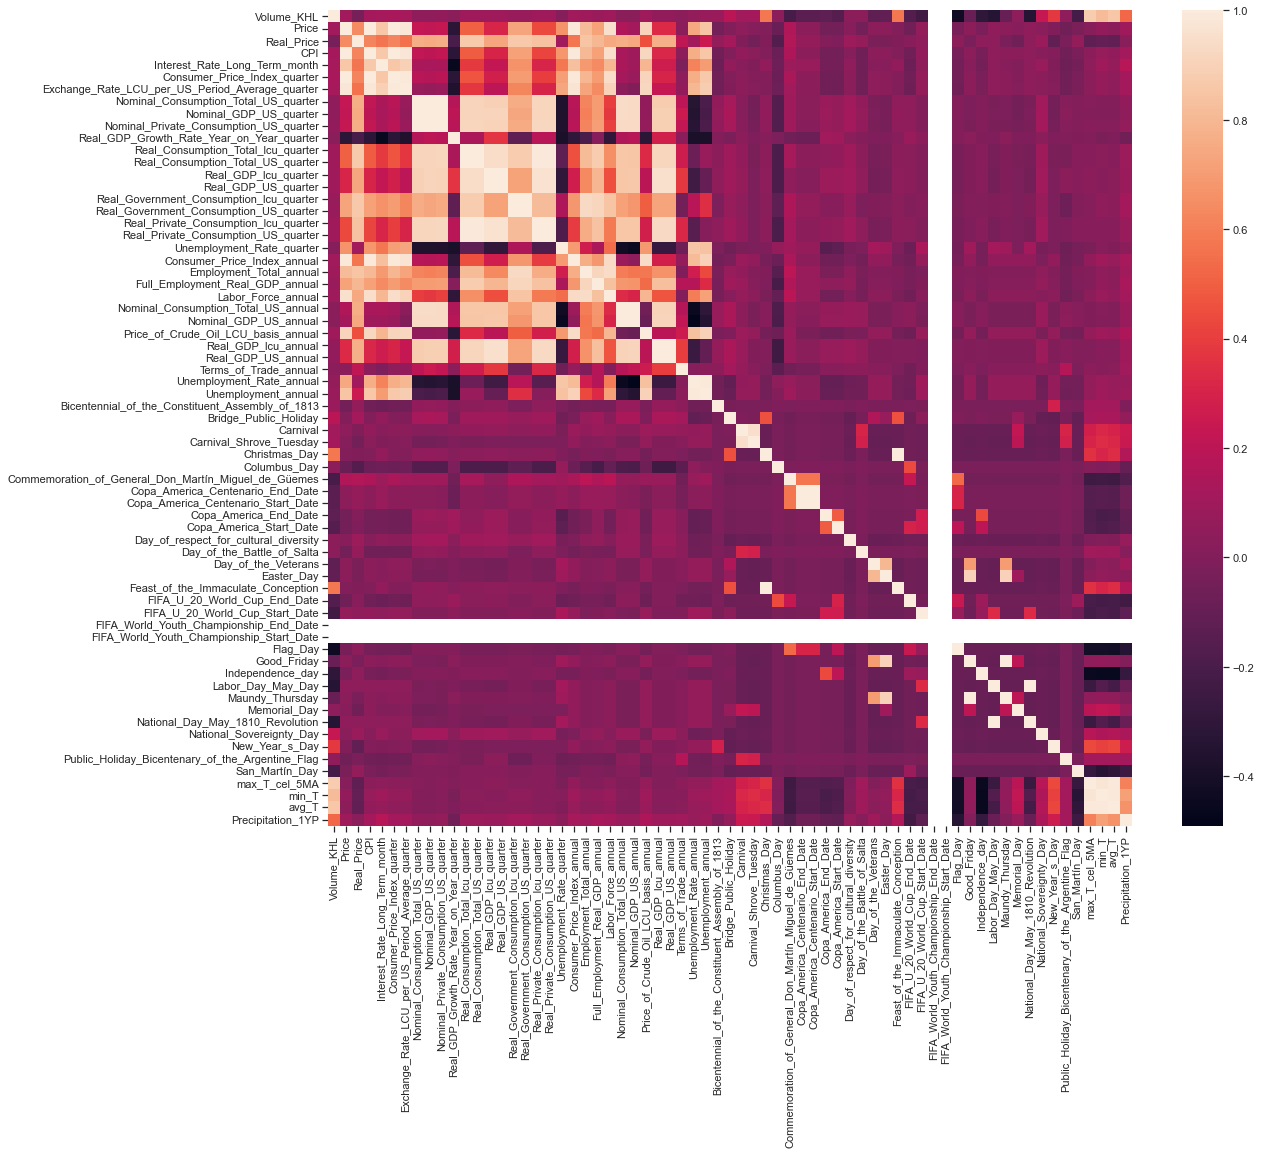

In [74]:
fig, ax = plt.subplots(figsize=(18,15))  
sns.heatmap(correlate)

#### From the correlation graph we can observe that average temperature, minimum temperature, max t cel, christmas are highly correlated with volume

#### It can also be noted that we will not be plotting the graphs for all 68 independent variables, we will choose the ones which have a higher correlation with the dependent variable (as can be seen above), along with some macro economic factors to analyse how they effect the sales.


In [46]:
sns.set_style('darkgrid')

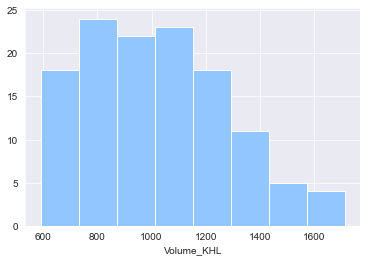

In [47]:
sns.distplot(df['Volume_KHL'], 
             kde=False, 
             hist_kws={'alpha':1}); 

#### Creating pairplots for various independent variables with Volume_KHL to see how they relate

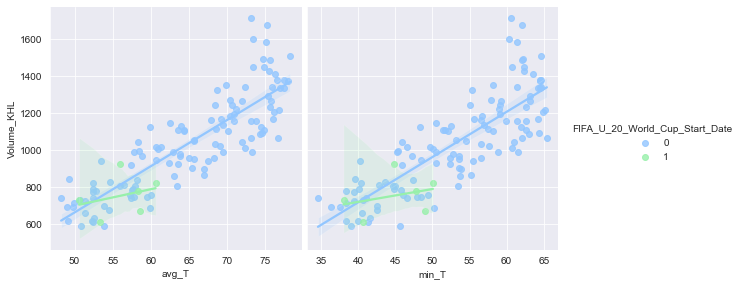

In [49]:
sns.pairplot(df, 
             hue='FIFA_U_20_World_Cup_Start_Date', 
             y_vars=['Volume_KHL'],
             x_vars=['avg_T', 'min_T'],
             kind='reg', 
             height=4);

##### It can be seen that the sales go up as the temperature goes up however FIFA is not affecting the sales

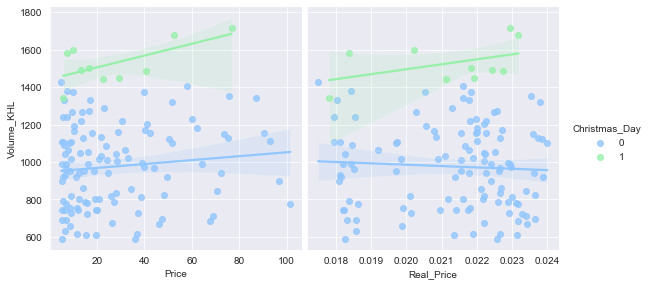

In [51]:
sns.pairplot(df, 
             hue='Christmas_Day', 
             y_vars=['Volume_KHL'],
             x_vars=['Price', 'Real_Price'],
             kind='reg', 
             height=4);

##### It can be observede that the sales are comparatively higher on christmas days

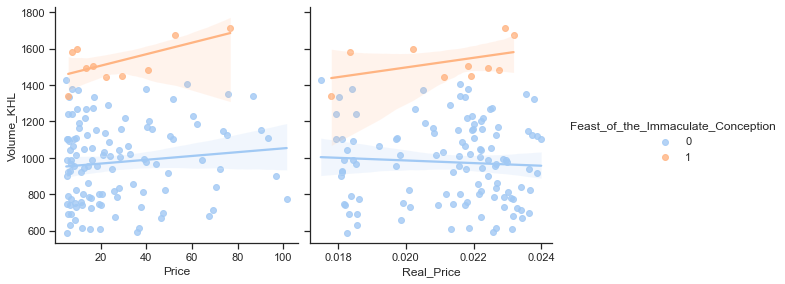

In [68]:
sns.pairplot(df, 
             hue='Feast_of_the_Immaculate_Conception', 
             y_vars=['Volume_KHL'],
             x_vars=['Price', 'Real_Price'],
             kind='reg', 
             height=4);

###### It can be observed that the sales are higher during Christmas days and Feast of the immaculate conception days

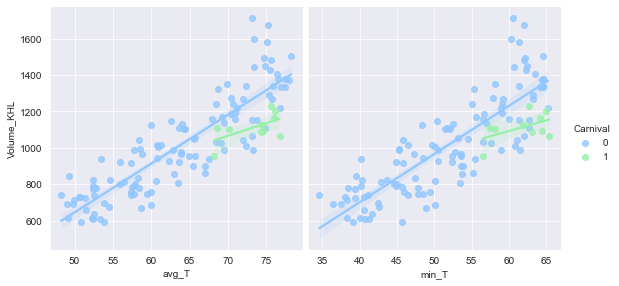

In [59]:
sns.pairplot(df, 
             hue='Carnival', 
             y_vars=['Volume_KHL'],
             x_vars=['avg_T', 'min_T'],
             kind='reg', 
             height=4);

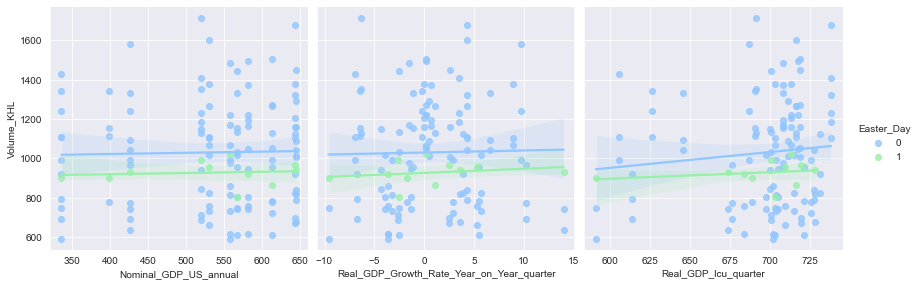

In [55]:
sns.pairplot(df, 
             hue='Easter_Day', 
             y_vars=['Volume_KHL'],
             x_vars=['Nominal_GDP_US_annual','Real_GDP_Growth_Rate_Year_on_Year_quarter','Real_GDP_lcu_quarter'],
             kind='reg', 
             height=4);

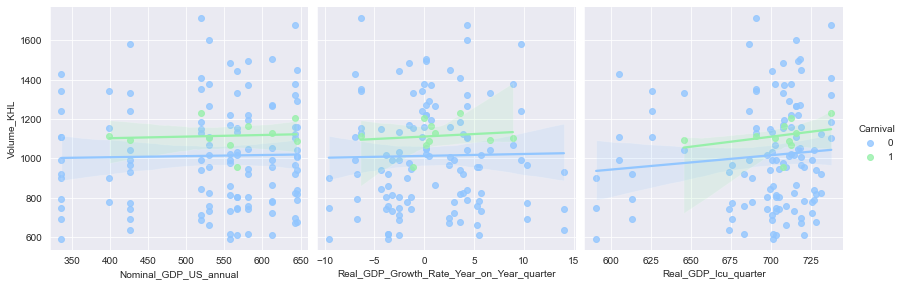

In [57]:
sns.pairplot(df, 
             hue='Carnival', 
             y_vars=['Volume_KHL'],
             x_vars=['Nominal_GDP_US_annual','Real_GDP_Growth_Rate_Year_on_Year_quarter','Real_GDP_lcu_quarter'],
             kind='reg', 
             height=4);

##### From the two set of plots above, we can conclude that the Macro economic factors like the GDP do not affect the sales much

<AxesSubplot:xlabel='avg_T', ylabel='Volume_KHL'>

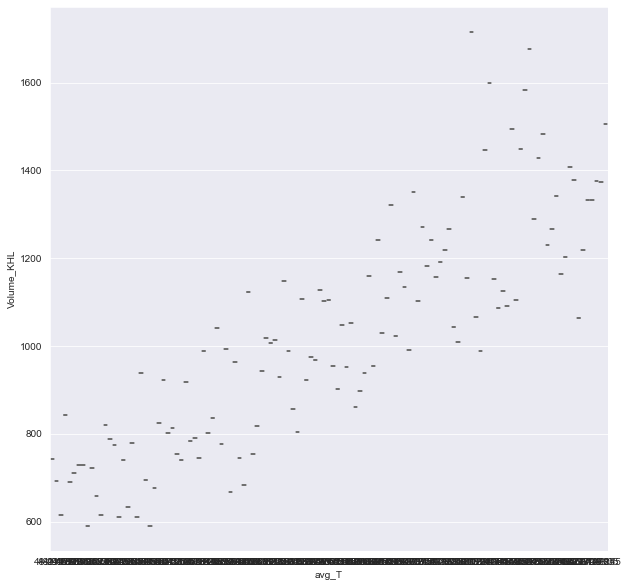

In [65]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="avg_T", y="Volume_KHL",
             palette=["m", "g"],
            data=df)

<AxesSubplot:xlabel='Precipitation_1YP', ylabel='Volume_KHL'>

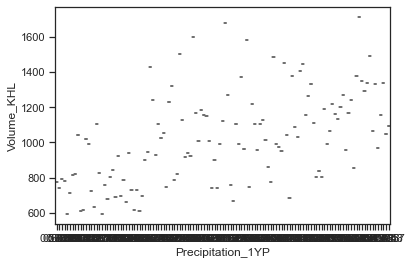

In [67]:
sns.boxplot(x="Precipitation_1YP", y="Volume_KHL",
             palette=["m", "g"],
            data=df)

Precipitation somewhat effects the sales

<AxesSubplot:xlabel='Volume_KHL', ylabel='CPI'>

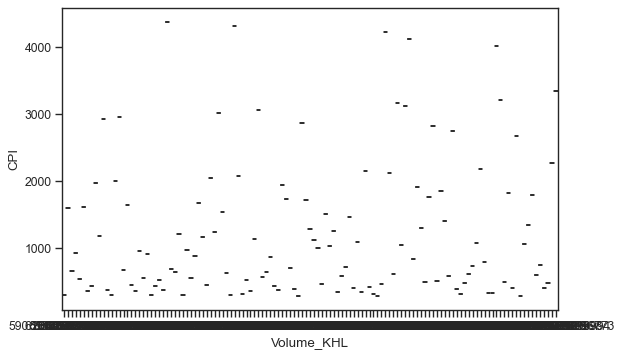

In [98]:
plt.figure(figsize=(8, 5), dpi=80)
sns.boxplot(y='CPI', x='Volume_KHL', 
                 data=df, 
                 palette="colorblind"
)

<AxesSubplot:xlabel='CPI', ylabel='Volume_KHL'>

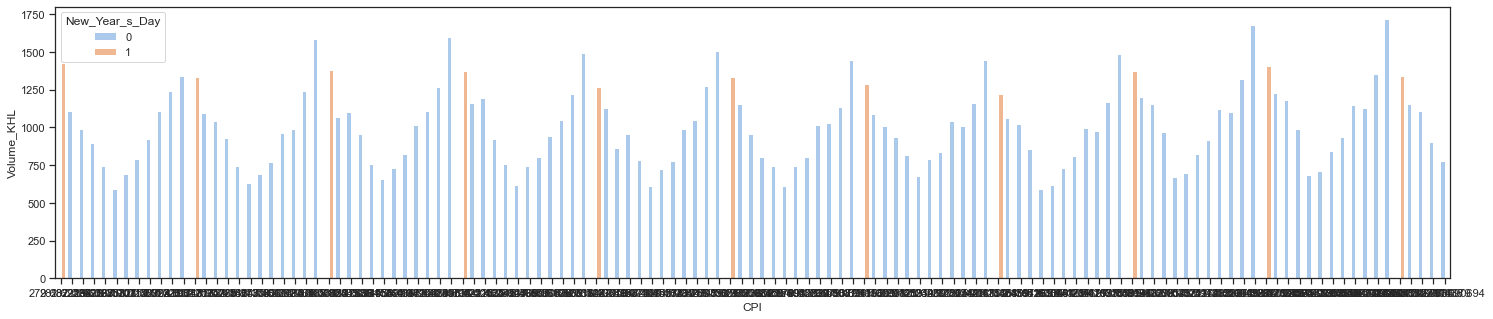

In [99]:
plt.figure(figsize=(25, 5))
sns.barplot(x='CPI',y='Volume_KHL', hue = 'New_Year_s_Day', data = df)

In [76]:
df['Period'].min()

Timestamp('2014-01-01 00:00:00')

In [77]:
df['Period'].max()

Timestamp('2022-12-01 00:00:00')

Text(0, 0.5, 'total volume')

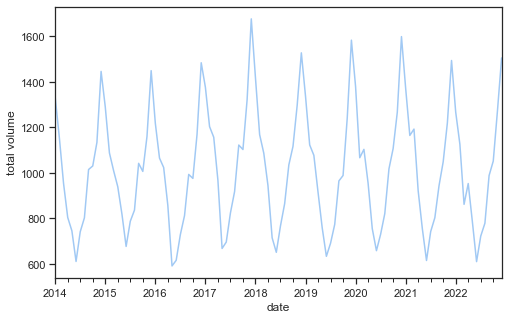

In [75]:
plt.rcParams['figure.figsize'] = (8,5)
df.groupby('Period')['Volume_KHL'].median().plot()
plt.xlabel('date')
plt.ylabel('total volume')

#### It can be observed that our data is non stationary because it has seasonal variations. Hence we will have to get rid of the seasonality and make the data stationary for forecasting. 

<AxesSubplot:xlabel='Period', ylabel='Volume_KHL'>

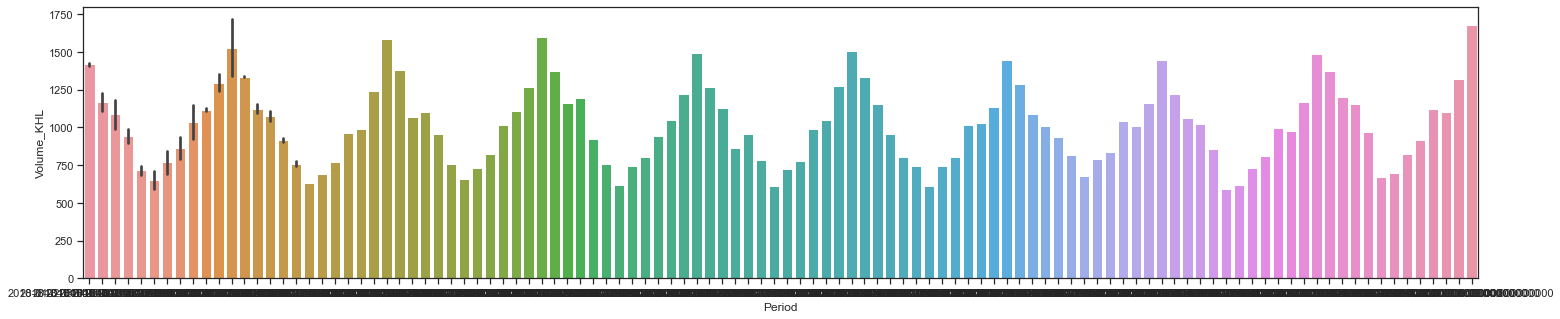

In [91]:
plt.figure(figsize=(25, 5))
sns.barplot(x='Period',y='Volume_KHL', data = df)

In [78]:
df['month_year'] = df['Period'].apply(lambda x: x.strftime('%Y-%m'))

In [79]:
df_temp = df.groupby('month_year').sum()['Volume_KHL'].reset_index()

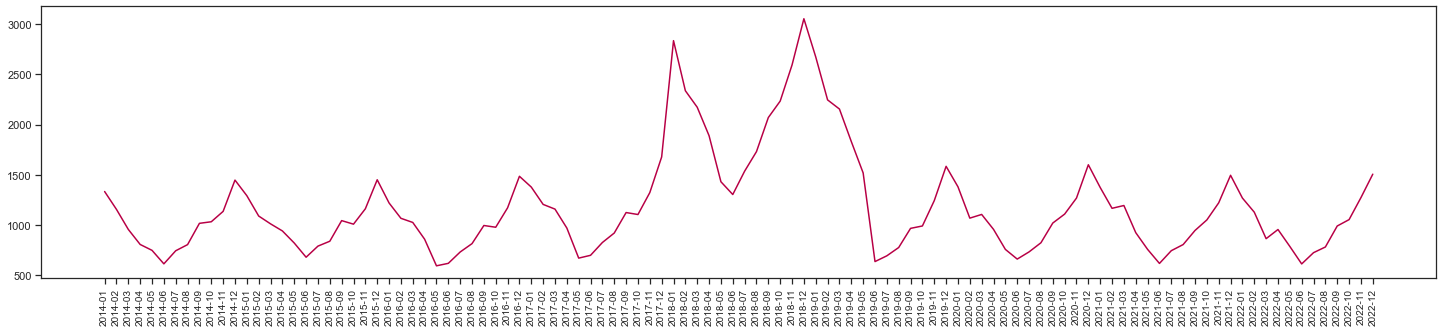

In [90]:
# Setting the figure size
plt.figure(figsize=(25, 5))
plt.plot(df_temp['month_year'], df_temp['Volume_KHL'], color='#b80045')
plt.xticks(rotation='vertical', size=10)
plt.show()

We can observe that every year in the 12th month (ie December) sales are comparatively higher. As we have observed from the previous results that the consumption is higher on Christmas day and feast of the immaculate conception day, both of which fall in the month of December.

Text(0, 0.5, 'total volume')

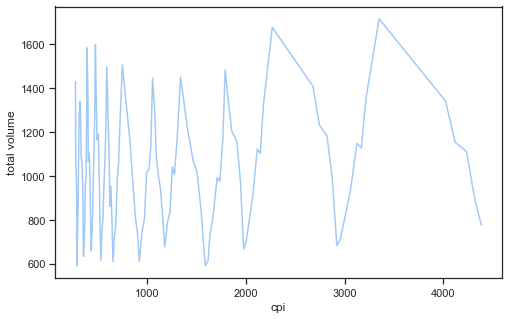

In [94]:
plt.rcParams['figure.figsize'] = (8,5)
df.groupby('CPI')['Volume_KHL'].median().plot()
plt.xlabel('cpi')
plt.ylabel('total volume')


**Check out the 2nd document for univariate analysis**